# Metodos de descenso usando gradiente

## Algoritmos de optimizacion

* Simulating Annealing
* Pattern Search (busqueda de matrones)
* Los metodos de Newton. Usan el gradiente y el Hessiano
* Quasi-Newton methods: Gradiente y una simplificacion del Hessiano (L-BFGS)
*  Metodos de descenso de gradiente (los que nosotros usaremos.
    * Steepest Descent (SD) (descenso maximo)
    * Congugate Gradient (CG) (gradiente conjugado)
    * Non-linear CG, extension del CG a funciones obejtivo no cuadraticas.
    * Stochastic Gradiet Descent (SGD). Es estadistico y muy
    rapido. (veremos en este curso Batch Gradient Descent como una variedad del SGD.


El gradiente (muy importante ) es el elemento fundamental para halla direccion hacia el maximo descenso. 

El "caballito de batalla" de los metodos de descenso con gradiente esta dado por la ecuacion

$$ \theta^{(i+1)} = \theta^{(i)} - \eta \nabla C(\theta^{(i)}) $$


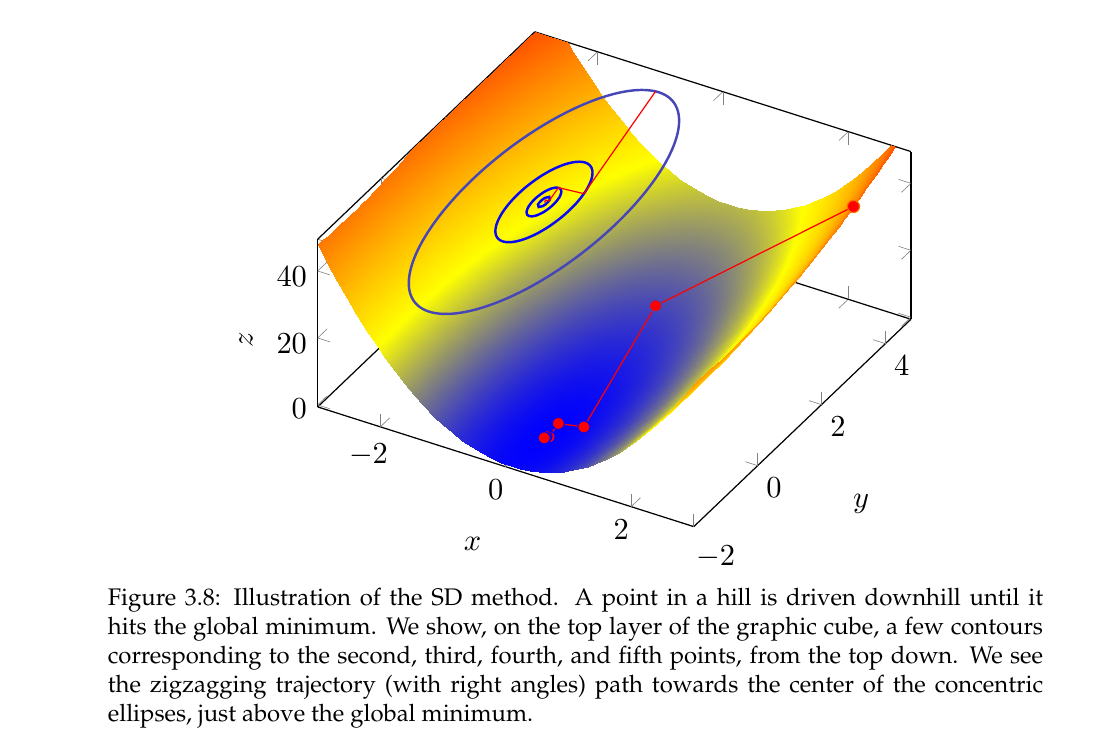



> Indented block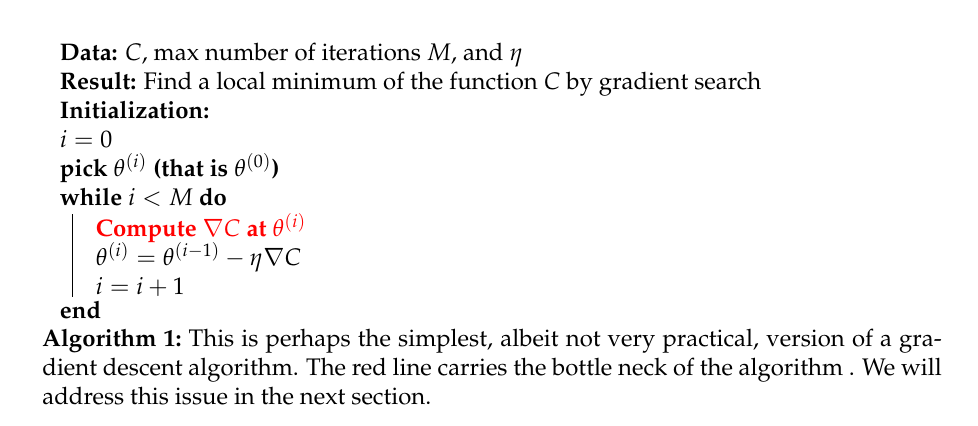



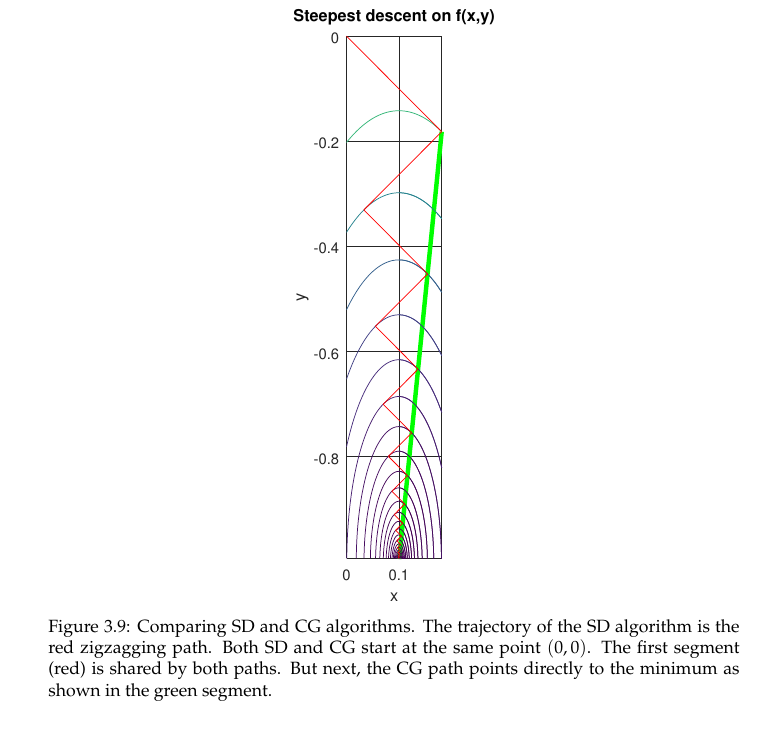

## Stochastic Gradient Descent (Descenso con gradiente estocastico

Un ejemplo intersante y motivante.

Asuma una red neuronal con los siguientes parametros:

* 10 capas ocultas (mas entrada/salida)
* La entrada consiste en 10000 cada una con $100 \times 100$
(gris, RGB implicaria multiplicar por 3).
* Cada capa tiene en promedio 100 nodos (neuronas)

Calculamos el numero de componentes que necesita el gradiente.  Los datos de entrada $10000 \times 100 \times 100 = 10^8$.

Los pesos=$10^8 \times 100^{10} = 10^{28} $

Seria imposible usar el "full" gradient para deep learning.

En el SG (Stochastic Gradient) el gradiente es la suma
sobre todos los datos de entrada ($m$). La idea clave
es escoger solo $1$ (entre $m$), por "full gradient" necesita evaluar $m$.

Veamos varios casos donde se muestra que el gradiente es
la suma de gradientes con respect a los datos de entrada $m$

* El problema de minimos cuadrados sin regularizacion:

$$ C(x, A, y) = \frac12 \| Ax - y \|^2 = \frac12 \sum_{i=1}^m  \left ( \sum_{j=1}^n (a_{ij} x_j - y_i \right )^2  $$

Podemos hacer un "casting" en terminos de partes elementales constituyentas.

Es decir:

$$C(x, A, y) = \frac1m \sum_{i=1}^m C_i( A, X, y) $$

donde
$$ C_i(x, A, y) =  \frac{m}{2} \left ( \sum_{j=1}^m  (a_{ij} x_j - y_i \right )^2$$

* Minimos cuadrados con regularizacion
$$ C(x, A, y) = \frac12 \| Ax - y \|^2 = \frac12 \sum_{i=1}^m  \left ( \sum_{j=1}^n (a_{ij} x_j - y_i \right )^2  + \frac{\lambda}{2} \sum_{i=1}^m x_i^2  $$

Tambien podemos hacer un "casting" en terminos de componentes "elementales"

$$C(x, A, y) = \frac1m \sum_{i=1}^m C_i(x, A, y)  $$

con

$$C_i(x, A, y) =  \frac{m}{2} \left ( \sum_{j=1}^m  (a_{ij} x_j - y_i \right )^2 + \frac{\lambda m}{2} x_i^2 $$

* Ultimo ejemplo: Regresion logistica regularizada.

$$ C(\theta, x, y) = -\frac1m \sum_{i=1}^m y_i \log[ h(\theta, x^{(i)}] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)}] + \frac{\lambda}{2m} \sum_{i=1}^m \theta_i^2 $$


Esto se puede escribir como

$$C(x, A, y) = \frac1m \sum_{i=1}^m C_i(x, A, y)  \quad (1) $$

con

$$C_i(x, A, y) = - \left [y_i \log[ h(\theta, x^{(i)}) +
(1 - y_i) \log [ 1 - h(\theta, x^{(i)}] 
    \right ] + \frac{\lambda}{2} \theta_i^2$$



En conclusion: Los gradientes que usamos en deep learning
se pueden ver como una suma (promedio) de gradientes elementales, correspondientes a un solo punto.
Por linealidad aplicando el gradiente en la ecuacion (1)
$$ \nabla C(x, \theta , y) = \frac1m \sum_{i=1}^m \nabla C_i(x, \theta, y) $$

Definimos los siguientes terminos:

* Si se calcula $\nabla C(x, \theta, y) $ (full) se llama
*Batch Gradient Descent*

* Si se calcula solo un $\nabla C_i(x, \theta, y) $ (ojo que el $i$ es aleatorio) entonces se le llama SGD (Stochastic Gradient Descent)

* Si en vez de esto se escoge un grupito con indiex $I$
y se calcula
$$ \sum_{i \in I} \nabla C_i(x, \theta , y)$$ se le llama
minibatch. Si $I$ es el conjuto de todos los indices es Batch. Si $I$ es solo un indice aleatorio se le llma SGD, si $I$ es un subconjuto propio de todos los indices se le llama minbatch ($\# I $) es pequeno.

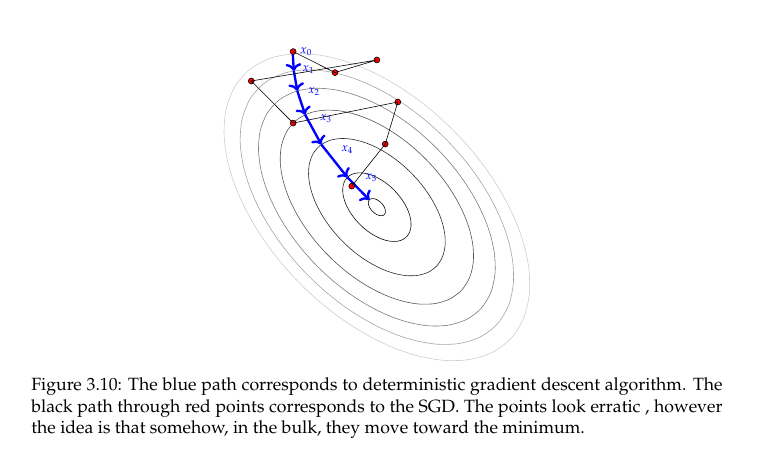

## Algoritmo.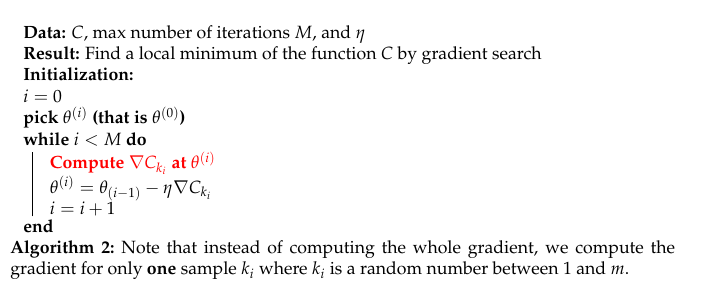

Por que "diablos" funciona el SGD.

Esto lo explicamos con un ejemplo:
Piense en 5 puntos a los cuales les queremos hacer regresion lineal (sabiendo que la linea pasa por el origen, el intercepto es 0).

Los puntos estarian en teoria serian

\begin{eqnarray}
y_1 &=& \theta x_1 \\
y_2 &=& \theta x_2 \\
y_3 &=& \theta x_3 \\
y_4 &=& \theta x_4 \\
y_5 &=& \theta x_5
\end{eqnarray}

A menos que todos los puntos esten alineados a largo de la linea $y=\theta x$, tenemos error y debemos minimizar el error.

Definimos la funcio de costo a minimizar

$$ C(\theta ) = \sum_{i=1}^5 \frac15 (\theta x_i - y_i)^2 $$

Eso lo podemos considerar como con base en componentes individuales (SGD), $C_i(\theta) = (\theta x_i - y_i)^2$

Calculemos el gradiente de $C:

$$ \nabla C(\theta) = \frac{d C}{d \theta} = \frac25 \sum_{i=1}^5 ( \theta x_i - y_i) x_i $$

Lo escribimos como una suma de $\nabla C_i(\theta)$

$$ \nabla C_i(\theta) = \frac{d C_i}{d \theta} = 2 (\theta x_i - y_i) x_i . $$

La funcion de costo $C_i(\theta)$ es una parabola. 
$(\theta x_i - y_i)^2 = x_i^2 \theta^2 - 2 \theta y_i + y_i^2$

Para ilustrar escogemos 5 puntos $(-1, -0.5), (1,1), (3,2), (4,3), (5,6)$. 

Con estos puntos las funciones objetivos son

\begin{eqnarray}
C_1(\theta) &=& (-\theta + 0.5)^2 \quad \text{minimo en $\theta=0.5$} \\
C_1(\theta) &=& (\theta -1)^2 \quad \text{minimo en $\theta=1$} \\
C_1(\theta) &=& (3 \theta -2 )^2 \quad \text{minimo en $\theta=0.667$} \\
C_1(\theta) &=& (4 \theta -3 )^2 \quad \text{minimo en $\theta=0.75$} \\
C_1(\theta) &=& (5 \theta -1 )^2 \quad \text{minimo en $\theta=0.5$} \\
\end{eqnarray}

$$\nabla C(\theta) = \frac15 \left [ (-\theta + 0.5)^2  + (\theta -1)^2 + (3 \theta -2 )^2 + (4 \theta -3)^2 + (5 \theta -6)^2
    \right ] $$



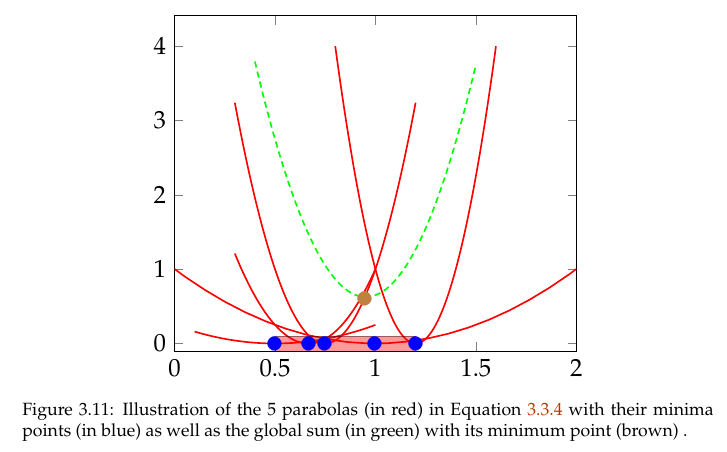

La banda roja que contiene los 5 puntos se llama *zona de confusion*`. Esta zona esta determinada por el intervalo $[m, M]$ donde $m$ es el minimo de todos los minimos y $M$ el maximo de todos los maximos. En dimensiones mayores es mas complicada. 

Formulamos tres preguntas:

* Que pasa cuando estamos dentro de la zona de confusion: Si el radio de la zona de confusion es pequeno estamos bien. Sino se recomienda minbatch gradient descent.
* Como estimamos la precision de este metodo (SGD): Esto es un problema estadistico. Calculemos la esperanza del gradiente (media)

$$\mathbb{E}[ \nabla C_i(\theta)] = \frac1m \sum_{i=1}  \nabla C_i(\theta) = \nabla C(\theta)  $$
Si la distribucion de $\nabla C_i(\theta)$ no es uniforme
entonces existe una distribucion $p_i$ 


$$\mathbb{E}[ \nabla C_i(\theta)] = \sum_{i=1}  \nabla C_i(\theta) p_i = \nabla C(\theta)  $$

Ahora la varianza:
$$ \mathbb{V}[ \nabla C_i(\theta)] = \frac{1}{m-1} \sum_{i=1}^m
\| \nabla C_i(\theta) -  \nabla C(\theta) \|^2$$

La idea es que esta varianza mide el error de aproximar
$\nabla C(\theta) $ con $\nabla C_i(\theta)$. Queremos
que la varianza sea pequena. Como se cura el problema de una varinza grande: respuesta: minibatch gradient descent.

* Como estimar el tamano correcto de $\eta$. (learning rate).
Esta pregunta la resolvemos entre hoy la proxima clase.
Mas complicada. Estudio en investigacion.


Hablemos primero de la region de confusion,.



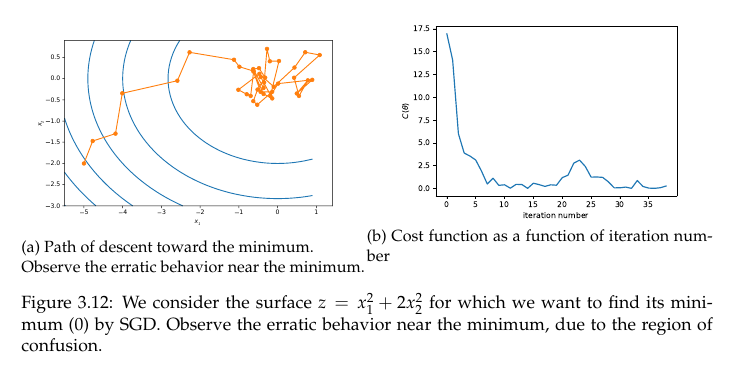

### Minibatch gradient descent:
Ayuda con la dispersion (varianza grande). Suaviza la trayectoria. El metodo es mas caro que el SGD (clasico) pero
se usa una relacion costo/beneficio. 

La idea es la siguiente, 

* Se revuelven los datos (shaffle) (estocastico)

* se parten los datos $m$ en $k$
grupos. Cada grupo tiene $int(m/k)= p$ mas un grupo con el residuo.

*se calcula el grupo $j=1,2, \cdots, k$

$$\nabla_j C(\theta) = \sum_{k_j=1}^{k} \nabla_{k_j} C(\theta) $$

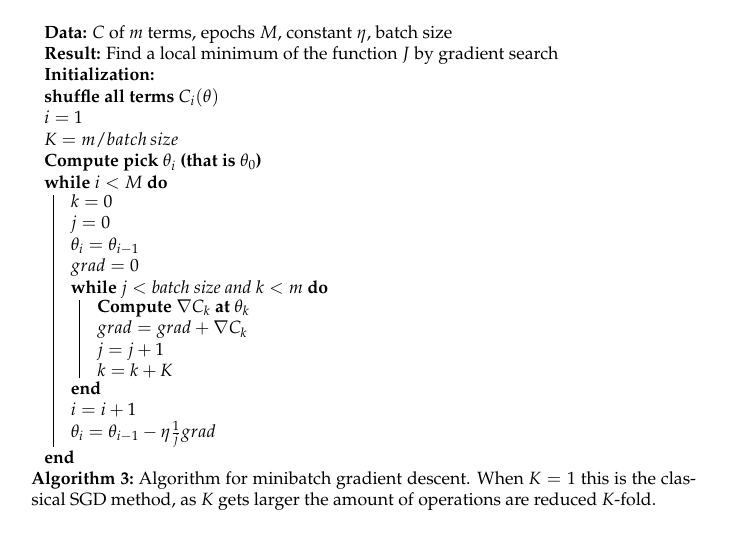

## Learning rate $\eta$. Que tamano.

Recuerde que el caballito de batalla del metodo de descenso con gradiente es:

$$ \theta^{(i)} = \theta^{(i-1)} - \eta \nabla C(\theta^{(i-1)})$$

Que tamano le damos a $\eta$.

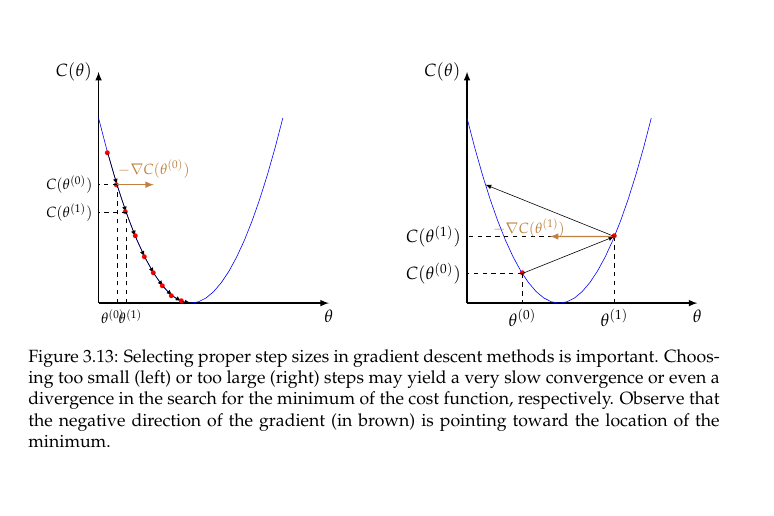

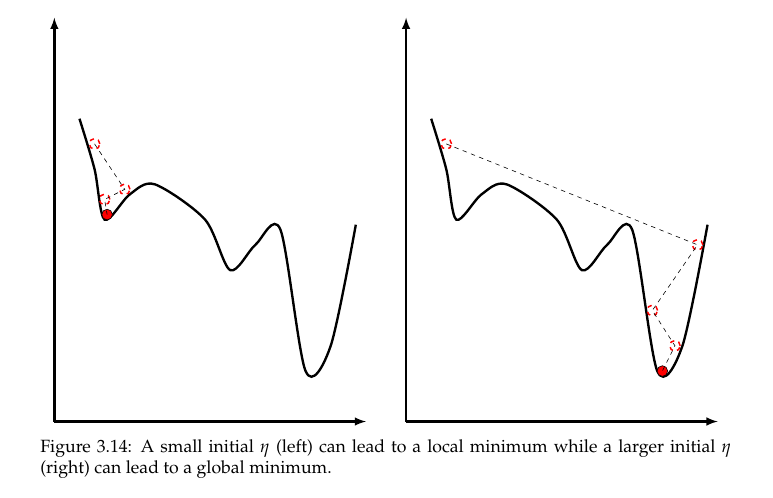

Algunos algoritmos usan $\eta$ constante o "adaptive" (de acuerdo a la "topografia" de la superficie.

Veamos otro (calculado) para entender mejor las limitaciones
del tamano de $\eta$.


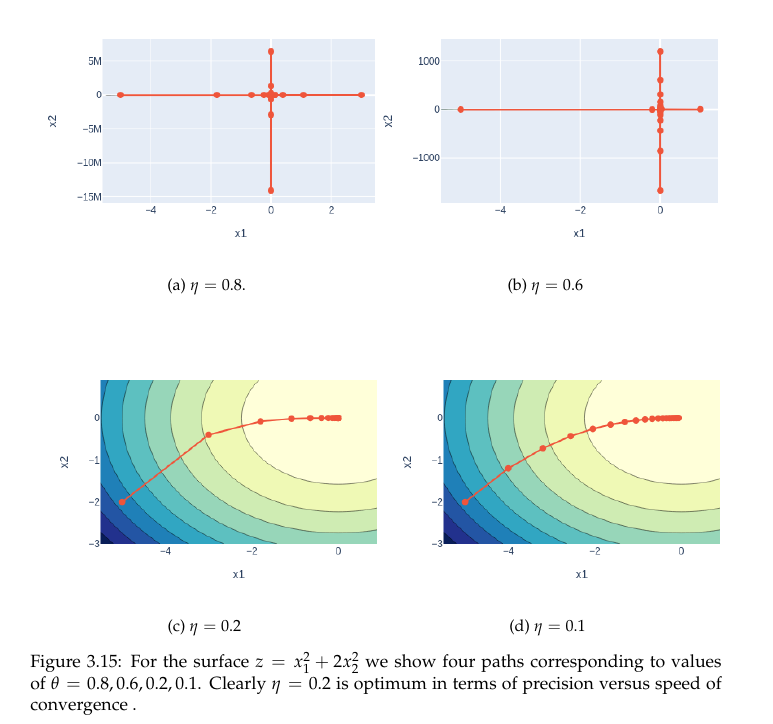

## Tecnicas de aceleracion de "caida"

Vemos 5 o 6 tecnicas, las voy nombrando a medida que las vamos estudiano.

Notacion: A veces usamos

$$g^{(i)} = \frac1n \sum_{j \in B_i} \nabla C_j(\theta) $$

Primera tecnica se

#### Momentum:
Lo invento Poliak en 1964 (referencia en las notas).
Lo llaman tambien el "heavy ball method".
Estos metodos funcionan cuando las elipses son muy achatadas.
Por ejemplo $z=0.1 x_1^2 + 2 x_2^2$

El algoritmo del momentum es:

\begin{eqnarray}
v^{(k)} &=& \beta v^{(k-1)} + (1 - \beta ) g^{(k)} \\
\theta^{(k)} &=& \theta^{(k-1)} - \eta v^{(k)}
\end{eqnarray}

Recordemos el algoritmo clasico


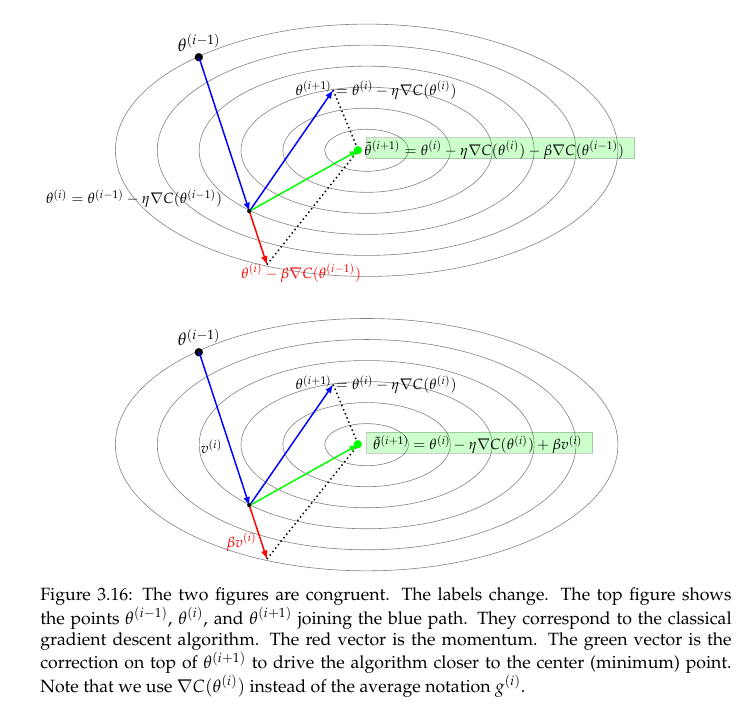